# LSTM-BI-LSTM-GRU-BI-GRU-RNN-BRNN 
# ALL Optimizers
# LingSpam Dataset

In [1]:
!pip3 install tensorflow-addons
!pip3 install keras-adabound
!pip3 install adabelief-tf==0.2.0

     |████████████████████████████████| 1.1 MB 13.4 MB/s 
  Created wheel for keras-adabound: filename=keras_adabound-0.6.0-py3-none-any.whl size=6607 sha256=8f977cf41e5fbcb32f8aa6a33efa18205d594118a4b9ad90571b39fd61707a4f
  Stored in directory: /root/.cache/pip/wheels/3e/bf/39/3d95847ef12aa58c15a6cc7a20f4f21ea39fcd52793e1beea0
Successfully built keras-adabound


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Time and counters
from time import perf_counter

# Optimizers
import tensorflow as tf 
import tensorflow_addons as tfa
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Nadam, Adadelta, Adamax, Ftrl
from adabelief_tf import AdaBeliefOptimizer
from keras_adabound import AdaBound

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda, Dense, Embedding, Bidirectional,concatenate
from tensorflow.keras.layers import Dropout, Input,InputLayer, ReLU, LSTM
from tensorflow.keras.layers import GRU, SimpleRNN
# from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#metrics
from sklearn.metrics import f1_score , recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import roc_curve, auc


import warnings
warnings.filterwarnings('ignore')

#Mark Down print
from IPython.display import Markdown, display

def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Optimizers and other paths

In [4]:
#paths
LINGSPAM   = "drive/MyDrive/Mahboob/Datasets/LingSpam/PROCESSED.csv" 
heatmaps   = "drive/MyDrive/Mahboob/Heatmaps/LingSpam/"
Visuals    = "drive/MyDrive/Mahboob/Visuals/LINGSPAM/"
Comparison = "drive/MyDrive/Mahboob/Comparison/"


adabelief      = "drive/MyDrive/Mahboob/Models/LINGSPAM/ADABELIEF/"
adabound      = "drive/MyDrive/Mahboob/Models/LINGSPAM/ADABOUND/"
adadelta      = "drive/MyDrive/Mahboob/Models/LINGSPAM/ADADELTA/"
adagrad      = "drive/MyDrive/Mahboob/Models/LINGSPAM/ADAGRAD/"
adam      = "drive/MyDrive/Mahboob/Models/LINGSPAM/ADAM/"
adamax      = "drive/MyDrive/Mahboob/Models/LINGSPAM/ADAMAX/"
adamw      = "drive/MyDrive/Mahboob/Models/LINGSPAM/ADAMW/"
amsbound      = "drive/MyDrive/Mahboob/Models/LINGSPAM/AMSBOUND/"
amsgrad      = "drive/MyDrive/Mahboob/Models/LINGSPAM/AMSGRAD/"
ftrl      = "drive/MyDrive/Mahboob/Models/LINGSPAM/FTRL/"
nadam      = "drive/MyDrive/Mahboob/Models/LINGSPAM/NADAM/"
radam      = "drive/MyDrive/Mahboob/Models/LINGSPAM/RADAM/"
rmsprop      = "drive/MyDrive/Mahboob/Models/LINGSPAM/RMSPROP/"
sgd      = "drive/MyDrive/Mahboob/Models/LINGSPAM/SGD/"
sgd_nesterov      = "drive/MyDrive/Mahboob/Models/LINGSPAM/SGD-NESTEROV/"
sgd_momentum      = "drive/MyDrive/Mahboob/Models/LINGSPAM/SGD-MOMENTUM/"

In [5]:
# 1. ALL Optimizer List
# Adam weight decay

AdamW = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
AMSGrad = Adam(amsgrad=True)
Rectified_Adam = tfa.optimizers.RectifiedAdam(learning_rate=0.001)

SGD_momentum = SGD(momentum=0.9)
Nesterov_SGD_momentum = SGD(momentum=0.9, nesterov=True)
#Adam #Nadam #SGD #RMSprop #Adadelta #Adagrad #Adamax #Ftrl
AdaBelief = AdaBeliefOptimizer(learning_rate=1e-3, epsilon=1e-14, rectify=False)
Adabound = AdaBound(lr=1e-3, final_lr=0.1)
AMSbound = AdaBound(lr=1e-3, final_lr=0.1, amsgrad=True)

Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
>=0.1.0 (Current 0.2.0)  1e-14  supported          default: True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended epsilon = 1e-7                                  Recommended epsilon = 1e-14
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.



In [6]:
# drive.mount("/content/drive", force_remount=True)
import sys
sys.path.append("drive/MyDrive/Mahboob/")
!ls
from utils import *

drive  sample_data
Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
>=0.1.0 (Current 0.2.0)  1e-14  supported          default: True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended epsilon = 1e-7                                  Recommended epsilon = 1e-14
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.



# Read Data

In [10]:
data = pd.read_csv(LINGSPAM)
# data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
# data.to_csv(LINGSPAM, index=False)

In [11]:
data.head()

,label,X
0,0,posting appleiss research centercontent length...
1,0,query letter frequency text identificationi po...
2,0,riska colleague researching differing degree r...
3,0,request book informationearlier morning phone ...
4,0,call abstract optimality syntactic theoryconte...


# Data Splitting

In [13]:
#Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(data.X , data.label, test_size = 0.2, random_state = 99)
print(f"Training split input: {X_train.shape}")
print(f"Testing split input : {X_test.shape}")
print(f"Training split class: {y_train.shape}")
print(f"Testing split class : {y_test.shape}")

maxLen = len(max(X_train.astype("U"), key=len).split())
print(f"Max length of the sentence in corpus : {maxLen}")

Training split input: (2243,)
Testing split input : (561,)
Training split class: (2243,)
Testing split class : (561,)
Max length of the sentence in corpus : 2290


In [14]:
print(f"Type of X_train : {type(X_train)}")
print(f"Training sample shape: \n{X_train.shape}\n")
x_train = np.array(X_train.copy())
x_train = x_train.astype(str)
print(f"Type of X_train : {type(x_train)} with dtypes : {x_train.dtype}")
print(f"First training sample: \n{x_train[0]}\n")
print(f"Training sample shape: \n{x_train.shape}\n\n")

print(f"Type of X_test : {type(X_test)}")
print(f"First testing sample shape: \n{X_test.shape}\n\n")
x_test = np.array(X_test.copy())
x_test= x_test.astype(str)
print(f"Type of X_test : {type(x_test)} with dtypes : {x_test.dtype}")
print(f"First testing sample: \n{x_test[0]}\n\n")
print(f"Testing sample shape: \n{x_test.shape}\n\n")

print(f"Type of y_train : {type(y_train)}")
print(f"First training label shape: \n{y_train.shape}\n\n")
Y_train = np.array(y_train.copy())
print(f"Type of y_train : {type(Y_train)}")
print(f"First training label : \n{Y_train[0]}\n\n")
print(f"Training label shape: \n{Y_train.shape}\n\n")

print(f"Type of y_test : {type(y_test)}")
print(f"First testing label shape: \n{y_test.shape}\n\n")
Y_test = np.array(y_test.copy())
print(f"Type of y_test : {type(Y_test)}")
print(f"First testing label : \n{Y_test[0]}\n\n")
print(f"Testing label shape: \n{Y_test.shape}\n\n")


Type of X_train : <class 'pandas.core.series.Series'>
Training sample shape: 
(2243,)

Type of X_train : <class 'numpy.ndarray'> with dtypes : <U17973
First training sample: 
latex slast month posted query latex summary response experience making choice gtex work plan adopt gtex especially window sure read comment save time first like thank following person proving power virtual community mailid richard alderson mark robert hale mailid michael covington mailid stewart nichols mailid mailid knappen mailid stuart luppescu mailid achim stein mailid hugo doest wilhelm weisweber mailid alex schoenmakers mailid peter arno coppen mailid mailid john koontz mailid suying yang robert dale mailid alfredo arnaiz mailid mailid craig thiersch alice drewery mailid message extremly helpful provided fairly detailed information many offered help needed thanks divided information following category number general info number unix option number commercial option number option number emtex number gtex incl

# ***Data set Processing***
1. Vocabulary creation 
2. Tokenization
3. Text to sequence / word to vector
4. Padding to max length
5. Implement sequence/index to word

In [15]:
"""
Input text Processing
steps : 

1. Vocabulary creation 
2. Tokenization
3. Text to sequence / word to vector
4. Padding to max length
5. Implement sequence/index to word
"""

# reference : https://www.kaggle.com/anirudhchandnani/ann-vs-lstm-vs-bi-lstm-on-nlp
#ANN

Train_data = x_train.copy()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)
tokenizer.word_index.keys()

Vocabulary Size : 44395


dict_keys(['number', 'language', 'university', 'money', 'mailid', 'paper', 'email', 'information', 'linguistics', 'address', 'conference', 'workshop', 'english', 'http', 'order', 'please', 'also', 'program', 'name', 'would', 'word', 'system', 'abstract', 'research', 'work', 'list', 'time', 'report', 'mail', 'people', 'submission', 'send', 'like', 'call', 'form', 'linguistic', 'book', 'first', 'theory', 'study', 'session', 'make', 'page', 'following', 'grammar', 'speech', 'text', 'case', 'author', 'available', 'free', 'question', 'student', 'many', 'issue', 'speaker', 'science', 'copy', 'year', 'registration', 'analysis', 'state', 'international', 'must', 'area', 'contact', 'take', 'computer', 'department', 'example', 'discussion', 'well', 'site', 'include', 'topic', 'linguist', 'discourse', 'structure', 'reference', 'business', 'different', 'including', 'know', 'syntax', 'internet', 'course', 'data', 'application', 'special', 'world', 'used', 'john', 'could', 'place', 'even', 'second',

In [16]:
# Index to word Function dict
idx_to_word = dict(map(reversed, tokenizer.word_index.items()))
print(f"length of word to index : {len(word_index)}")
print(f"length of index to word : {len(idx_to_word)}")

length of word to index : 44394
length of index to word : 44394


In [17]:
x_train = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen = 2000, padding="post")
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen = 2000, padding="post")

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

print(f"Training : {type(x_train)}")
print(f"Testing: {type(x_test)}")

Training X Shape: (2243, 2000)
Testing X Shape: (561, 2000)
Training : <class 'numpy.ndarray'>
Testing: <class 'numpy.ndarray'>


In [18]:
#The first 5 training samples
for i in range(5):
  print(x_train[i],"\n")

[  757 22225   298 ...     0     0     0] 

[ 232 3712 1044 ...    0    0    0] 

[   37     2 22284 ...     0     0     0] 

[ 8094   451 22311 ...     0     0     0] 

[5 1 7 ... 0 0 0] 



In [19]:
## some config values 
embed_size = 50 # how big is each word vector
max_feature = vocab_size # how many unique words to use (i.e num rows in embedding vector)
max_len = 2000 # max number of words in a question to use

# Model Training

In [20]:
def Model_Train(arc_func, optim_func):
  model = arc_func(maxLength=max_len, maxFeature= max_feature, embedding_vecor_length= embed_size)
  model.compile(optimizer=optim_func, loss='binary_crossentropy', metrics=['accuracy',])
  start = perf_counter()
  history = model.fit(x_train, Y_train, batch_size=512, epochs=10, validation_split=0.2)
  duration = perf_counter() - start
  duration = round(duration,2)

  # Predicting the Test set results
  y_pred = model.predict(x_test)
  y_pred = (y_pred > 0.5)
  y_pred = np.array(y_pred)

  test_loss, test_acc = model.evaluate(x_test, Y_test)
  test_err = 100 - test_acc*100

  print(f"Test Loss:     {test_loss*100} %")
  print(f"Test Accuracy: {test_acc*100}  %")
  print(f"Test error: {test_err}  %")

  return model, history, duration, y_pred, test_loss

In [21]:
Optimizer_list = ["Adam", "Nadam", "SGD", "RMSProp", "Adagrad", "Adadelta", "Ftrl", "SGD-Momentum", "SGD-Nesterov-Momentum", "Adam-Weight-Decay"] 

Optimizer_function_list = [Adam(), Nadam(), SGD(), RMSprop(), Adagrad(), Adadelta(), Ftrl(), SGD(momentum=0.9), SGD(momentum=0.9, nesterov=True), tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)]


Model_Architectures = {
    "BRNN" : BI_RNN_ARCHITECTURE,
    "Bi-LSTM" : BI_LSTM_ARCHITECTURE,
    "Bi-GRU" : BI_GRU_ARCHITECTURE
}

Deliverables = {
    "Optimizer_history" : {
          "BRNN" : [],
          "Bi-LSTM" : [],
          "Bi-GRU" : []
    },
    "Models" : {
          "BRNN" : [],
          "Bi-LSTM" : [],
          "Bi-GRU" : []        
    },
    "Duration" : {
          "BRNN" : [],
          "Bi-LSTM" : [],
          "Bi-GRU" : []        
    },
    "Y_pred" : {
          "BRNN" : [],
          "Bi-LSTM" : [],
          "Bi-GRU" : []        
    },
    "Test_Loss" : {
          "BRNN" : [],
          "Bi-LSTM" : [],
          "Bi-GRU" : []        
    },
}



# BRNN - Bi-LSTM - Bi-GRU
## Adam, Nadam, SGD, RMSprop, Adagrad, Adadelta, Ftrl, SGD momentum, SGD Nesterov Momentum, Adamw 

In [22]:
for k,v in enumerate(Model_Architectures.items()):
  for j in Optimizer_function_list:
    print(f"{k} : {v} , optimizer : {j}")
    model, history, duration, y_pred, test_loss = Model_Train(v[1],j)
    Deliverables["Optimizer_history"][v[0]].append(history)
    Deliverables["Models"][v[0]].append(model)
    Deliverables["Duration"][v[0]].append(duration)
    Deliverables["Y_pred"][v[0]].append(y_pred)
    Deliverables["Test_Loss"][v[0]].append(test_loss)
    print("done training")

0 : ('BRNN', <function BI_RNN_ARCHITECTURE at 0x7f5893f82c20>) , optimizer : <keras.optimizer_v2.adam.Adam object at 0x7f5893710450>
Epoch 1/10
4/4 [==============================] - 17s 4s/step - loss: 0.6484 - accuracy: 0.6533 - val_loss: 0.5093 - val_accuracy: 0.8419
Epoch 2/10
4/4 [==============================] - 14s 3s/step - loss: 0.4716 - accuracy: 0.8339 - val_loss: 0.4317 - val_accuracy: 0.8441
Epoch 3/10
4/4 [==============================] - 14s 3s/step - loss: 0.4560 - accuracy: 0.8344 - val_loss: 0.4218 - val_accuracy: 0.8441
Epoch 4/10
4/4 [==============================] - 13s 3s/step - loss: 0.4124 - accuracy: 0.8356 - val_loss: 0.4530 - val_accuracy: 0.8441
Epoch 5/10
4/4 [==============================] - 13s 3s/step - loss: 0.3842 - accuracy: 0.8350 - val_loss: 0.4292 - val_accuracy: 0.8441
Epoch 6/10
4/4 [==============================] - 13s 3s/step - loss: 0.3564 - accuracy: 0.8372 - val_loss: 0.3983 - val_accuracy: 0.8441
Epoch 7/10
4/4 [=======================

# Model comparison table with metrics : 
1. Accuracy
  - Train Accuracy from history object
  - Test Accuracy from get_Metrics Function in utils
2. Loss
  - Train loss curve From history object
  - Test loss From Model Evaluation  
3. Precision, Recall, F1 score
4. ROC AUC

In [55]:
"""
Model comparison table with metrics : 
1. Accuracy
2. Loss
3. Error
4. Precision, Recall, F1 score
5. ROC AUC
"""
Model_comparison = dict()

for k,v in enumerate(Model_Architectures.items()):
  for index_of_optim, i in enumerate(Optimizer_list):
    # print(v[0])
    history_curr = Deliverables["Optimizer_history"][v[0]][index_of_optim]
    acc_train = history_curr.history["accuracy"][len(history_curr.history["accuracy"])-1]
    
    y_pred = Deliverables["Y_pred"][v[0]][index_of_optim]
    
    loss_test = Deliverables["Test_Loss"][v[0]][index_of_optim]
    
    duration = Deliverables["Duration"][v[0]][index_of_optim]
    
    precision, recall, f1_score_, acc_test, auc_ = get_Metrics(Y_test, y_pred)
    
    Model_comparison[f"{v[0]} {i}"] = { 
        "Train_acc":acc_train, 
        "Test_acc":acc_test, 
        "Test_loss" : loss_test, 
        "auroc":auc_, 
        "f1_score":f1_score_, 
        "precision":precision, 
        "recall":recall,  
        "duration": duration 
        }
    print(f"{v[0]} {i} done")    

BRNN Adam done
BRNN Nadam done
BRNN SGD done
BRNN RMSProp done
BRNN Adagrad done
BRNN Adadelta done
BRNN Ftrl done
BRNN SGD-Momentum done
BRNN SGD-Nesterov-Momentum done
BRNN Adam-Weight-Decay done
Bi-LSTM Adam done
Bi-LSTM Nadam done
Bi-LSTM SGD done
Bi-LSTM RMSProp done
Bi-LSTM Adagrad done
Bi-LSTM Adadelta done
Bi-LSTM Ftrl done
Bi-LSTM SGD-Momentum done
Bi-LSTM SGD-Nesterov-Momentum done
Bi-LSTM Adam-Weight-Decay done
Bi-GRU Adam done
Bi-GRU Nadam done
Bi-GRU SGD done
Bi-GRU RMSProp done
Bi-GRU Adagrad done
Bi-GRU Adadelta done
Bi-GRU Ftrl done
Bi-GRU SGD-Momentum done
Bi-GRU SGD-Nesterov-Momentum done
Bi-GRU Adam-Weight-Decay done


In [151]:
import re
models_metrics = []
BRNN_metrics = []
BILSTM_metrics = []
BIGRU_metrics = []
ALL = [models_metrics, BRNN_metrics, BILSTM_metrics, BIGRU_metrics] 
ALL_names = ["LingSpam_comparison", "LingSpam_BRNN_comparison", "LingSpam_Bi-LSTM_comparison", "LingSpam_Bi-GRU_comparison"]

for name, model in Model_comparison.items():
  precision, recall, f1_score_,  = model["precision"], model["recall"], model["f1_score"]
  Test_acc, auc_, Test_loss = model["Test_acc"], model["auroc"], model["Test_loss"],
  Train_acc, duration = model["Train_acc"], model["duration"]
  models_metrics.append([name, precision, recall, f1_score_, Train_acc, Test_acc, Test_loss, auc_, duration])
  if re.match(r"^BRNN*", name):
    BRNN_metrics.append([name, precision, recall, f1_score_, Train_acc, Test_acc, Test_loss, auc_, duration])
  if re.match(r"^Bi-LSTM*", name):
    BILSTM_metrics.append([name, precision, recall, f1_score_, Train_acc, Test_acc, Test_loss, auc_, duration])
  if re.match(r"^Bi-GRU*", name):
    BIGRU_metrics.append([name, precision, recall, f1_score_, Train_acc, Test_acc, Test_loss, auc_, duration])

for i,j in zip(ALL, ALL_names):
  df_metrics = pd.DataFrame(i)
  df_metrics.columns = ['Model', 'Precision', 'Recall', 'f1 score', "Train Accuracy", 'Test Accuracy', 'Loss', 'ROC-AUC', 'Train Time (s)']
  df_metrics.sort_values(by = 'Test Accuracy', ascending = False, inplace=True)
  df_metrics.reset_index(drop = True, inplace=True)
  df_metrics.to_csv(f"{Comparison}{j}.csv")

In [152]:
import pprint
pprint.pprint(Model_comparison)

{'BRNN Adadelta': {'Test_acc': 0.41711229946524064,
                   'Test_loss': 0.7017707824707031,
                   'Train_acc': 0.4364548623561859,
                   'auroc': 0.5163865546218487,
                   'duration': 136.04,
                   'f1_score': 0.3881775764832226,
                   'precision': 0.5090477360189962,
                   'recall': 0.5163865546218487},
 'BRNN Adagrad': {'Test_acc': 0.8484848484848485,
                  'Test_loss': 0.4872974455356598,
                  'Train_acc': 0.8350055813789368,
                  'auroc': 0.5,
                  'duration': 136.13,
                  'f1_score': 0.4590163934426229,
                  'precision': 0.42424242424242425,
                  'recall': 0.5},
 'BRNN Adam': {'Test_acc': 0.9714795008912656,
               'Test_loss': 0.16227050125598907,
               'Train_acc': 0.9771460294723511,
               'auroc': 0.9203781512605043,
               'duration': 137.58,
               'f1_scor

In [78]:
df_metrics

,Model,Precision,Recall,f1 score,Train Accuracy,Test Accuracy,Loss,ROC-AUC,Train Time (s)
0,Bi-GRU Nadam,0.984951,0.980252,0.982584,1.000000,0.991087,0.045071,0.980252,17.88
1,Bi-GRU RMSProp,0.993776,0.964706,0.978576,0.999443,0.989305,0.042617,0.964706,18.17
2,Bi-GRU Adam-Weight-Decay,0.964173,0.981933,0.972792,0.997770,0.985740,0.034782,0.981933,17.40
3,Bi-GRU Adam,0.945754,0.967017,0.955993,0.999443,0.976827,0.062077,0.967017,17.25
4,Bi-GRU SGD,0.424242,0.500000,0.459016,0.835006,0.848485,0.601434,0.500000,17.45
5,Bi-GRU Adagrad,0.424242,0.500000,0.459016,0.835006,0.848485,0.665338,0.500000,17.20
6,Bi-GRU Ftrl,0.424242,0.500000,0.459016,0.835006,0.848485,0.689519,0.500000,17.36
7,Bi-GRU SGD-Momentum,0.424242,0.500000,0.459016,0.835006,0.848485,0.425905,0.500000,17.24
8,Bi-GRU SGD-Nesterov-Momentum,0.424242,0.500000,0.459016,0.835006,0.848485,0.425101,0.500000,18.10
9,Bi-GRU Adadelta,0.492647,0.486765,0.461691,0.589186,0.588235,0.692193,0.486765,17.24


# Save the model objects for graph

In [65]:
import pickle
with open(f"{Visuals}LingSpam_history.pkl", "wb") as open_file:
    pickle.dump(Deliverables["Optimizer_history"], open_file)
with open(f"{Visuals}LingSpam_y_pred.pkl", "wb") as open_file:
    pickle.dump(Deliverables["Y_pred"], open_file)

INFO:tensorflow:Assets written to: ram://26ab8874-a0a1-4587-8f88-c788afbae57b/assets


INFO:tensorflow:Assets written to: ram://26ab8874-a0a1-4587-8f88-c788afbae57b/assets


INFO:tensorflow:Assets written to: ram://31c5fb87-f8eb-4c1f-b2cc-235bcf0cec59/assets


INFO:tensorflow:Assets written to: ram://31c5fb87-f8eb-4c1f-b2cc-235bcf0cec59/assets


INFO:tensorflow:Assets written to: ram://9002c2f4-fa4a-4f99-9a67-98e09019cb1b/assets


INFO:tensorflow:Assets written to: ram://9002c2f4-fa4a-4f99-9a67-98e09019cb1b/assets


INFO:tensorflow:Assets written to: ram://181fa838-e198-49e4-b68f-689e1cc8201d/assets


INFO:tensorflow:Assets written to: ram://181fa838-e198-49e4-b68f-689e1cc8201d/assets


INFO:tensorflow:Assets written to: ram://94fb8b01-ddb7-4049-8da3-19475b19df09/assets


INFO:tensorflow:Assets written to: ram://94fb8b01-ddb7-4049-8da3-19475b19df09/assets


INFO:tensorflow:Assets written to: ram://c84edbc1-f169-4adc-97cf-ee92877edba5/assets


INFO:tensorflow:Assets written to: ram://c84edbc1-f169-4adc-97cf-ee92877edba5/assets


INFO:tensorflow:Assets written to: ram://35f95e1c-085c-4c7f-9cef-3d6d72e5ff11/assets


INFO:tensorflow:Assets written to: ram://35f95e1c-085c-4c7f-9cef-3d6d72e5ff11/assets


INFO:tensorflow:Assets written to: ram://8a7b6041-e8f5-413f-aa20-4d9bfd3abf7a/assets


INFO:tensorflow:Assets written to: ram://8a7b6041-e8f5-413f-aa20-4d9bfd3abf7a/assets


INFO:tensorflow:Assets written to: ram://a663ffe3-f256-473b-8227-2dbc9294f01d/assets


INFO:tensorflow:Assets written to: ram://a663ffe3-f256-473b-8227-2dbc9294f01d/assets


INFO:tensorflow:Assets written to: ram://23ad80fc-de81-4d39-bd81-29271e2432cb/assets


INFO:tensorflow:Assets written to: ram://23ad80fc-de81-4d39-bd81-29271e2432cb/assets


INFO:tensorflow:Assets written to: ram://2386f9bf-6a35-4a59-b2c8-7da1b41bb88b/assets


INFO:tensorflow:Assets written to: ram://2386f9bf-6a35-4a59-b2c8-7da1b41bb88b/assets


INFO:tensorflow:Assets written to: ram://81949bcc-d3d6-4c70-a5d3-1ee71ce72384/assets


INFO:tensorflow:Assets written to: ram://81949bcc-d3d6-4c70-a5d3-1ee71ce72384/assets


INFO:tensorflow:Assets written to: ram://344877d8-9b7a-42c9-ad45-6f1948ad2529/assets


INFO:tensorflow:Assets written to: ram://344877d8-9b7a-42c9-ad45-6f1948ad2529/assets


INFO:tensorflow:Assets written to: ram://d57d3f85-7255-4886-8eeb-21fbf5101c19/assets


INFO:tensorflow:Assets written to: ram://d57d3f85-7255-4886-8eeb-21fbf5101c19/assets


INFO:tensorflow:Assets written to: ram://93a201d9-ebd1-4f96-b7c1-2b4b48bb6a36/assets


INFO:tensorflow:Assets written to: ram://93a201d9-ebd1-4f96-b7c1-2b4b48bb6a36/assets


INFO:tensorflow:Assets written to: ram://43ce072b-df8b-4f54-8370-5292a74b17ce/assets


INFO:tensorflow:Assets written to: ram://43ce072b-df8b-4f54-8370-5292a74b17ce/assets


INFO:tensorflow:Assets written to: ram://07bbc531-b27f-43c0-99d4-93d9c1dd78c3/assets


INFO:tensorflow:Assets written to: ram://07bbc531-b27f-43c0-99d4-93d9c1dd78c3/assets


INFO:tensorflow:Assets written to: ram://fc0ca648-ad1f-42e7-aee9-c52394c3ae3c/assets


INFO:tensorflow:Assets written to: ram://fc0ca648-ad1f-42e7-aee9-c52394c3ae3c/assets


INFO:tensorflow:Assets written to: ram://3d8d792c-cb83-4c11-aeef-97855bf0a7c9/assets


INFO:tensorflow:Assets written to: ram://3d8d792c-cb83-4c11-aeef-97855bf0a7c9/assets


INFO:tensorflow:Assets written to: ram://bac27034-2ba4-480d-beeb-466007a9b845/assets


INFO:tensorflow:Assets written to: ram://bac27034-2ba4-480d-beeb-466007a9b845/assets


INFO:tensorflow:Assets written to: ram://16bbce5d-2ac8-4875-875e-6127ad9de301/assets


INFO:tensorflow:Assets written to: ram://16bbce5d-2ac8-4875-875e-6127ad9de301/assets


INFO:tensorflow:Assets written to: ram://6f1933bf-4125-419d-86f9-4f5f778e0f73/assets


INFO:tensorflow:Assets written to: ram://6f1933bf-4125-419d-86f9-4f5f778e0f73/assets


INFO:tensorflow:Assets written to: ram://f40e3c13-8d53-4ee7-b8da-aae108ae9b02/assets


INFO:tensorflow:Assets written to: ram://f40e3c13-8d53-4ee7-b8da-aae108ae9b02/assets


INFO:tensorflow:Assets written to: ram://65e77873-bcd3-4293-b350-22d0e0facc80/assets


INFO:tensorflow:Assets written to: ram://65e77873-bcd3-4293-b350-22d0e0facc80/assets


INFO:tensorflow:Assets written to: ram://81b48c36-ae00-4c20-8bd5-24d132c894aa/assets


INFO:tensorflow:Assets written to: ram://81b48c36-ae00-4c20-8bd5-24d132c894aa/assets


INFO:tensorflow:Assets written to: ram://e07305de-e20d-4538-ae43-7e603579afc0/assets


INFO:tensorflow:Assets written to: ram://e07305de-e20d-4538-ae43-7e603579afc0/assets


INFO:tensorflow:Assets written to: ram://f6f624c6-0bb0-4b83-bbba-dc73dc0309b3/assets


INFO:tensorflow:Assets written to: ram://f6f624c6-0bb0-4b83-bbba-dc73dc0309b3/assets


INFO:tensorflow:Assets written to: ram://e26a3cb1-9d0a-427c-9d7b-659039f2c4c7/assets


INFO:tensorflow:Assets written to: ram://e26a3cb1-9d0a-427c-9d7b-659039f2c4c7/assets


INFO:tensorflow:Assets written to: ram://a9048234-6701-4bc6-bc84-18c3b0a6024c/assets


INFO:tensorflow:Assets written to: ram://a9048234-6701-4bc6-bc84-18c3b0a6024c/assets


INFO:tensorflow:Assets written to: ram://c910c022-1f78-40cf-abff-c8b3ba8ad51b/assets


INFO:tensorflow:Assets written to: ram://c910c022-1f78-40cf-abff-c8b3ba8ad51b/assets


BRNN [<keras.callbacks.History object at 0x7f58927fdc10>, <keras.callbacks.History object at 0x7f58144df610>, <keras.callbacks.History object at 0x7f57fe583cd0>, <keras.callbacks.History object at 0x7f57fe0a71d0>, <keras.callbacks.History object at 0x7f57f813c090>, <keras.callbacks.History object at 0x7f56f4e9b110>, <keras.callbacks.History object at 0x7f56f49c5410>, <keras.callbacks.History object at 0x7f56ee7b5090>, <keras.callbacks.History object at 0x7f56ef6c8b90>, <keras.callbacks.History object at 0x7f56ef2c38d0>]
Bi-LSTM [<keras.callbacks.History object at 0x7f56e8e70a90>, <keras.callbacks.History object at 0x7f56e9bf5910>, <keras.callbacks.History object at 0x7f56e6c7fd50>, <keras.callbacks.History object at 0x7f55bd1cca90>, <keras.callbacks.History object at 0x7f55acd11c90>, <keras.callbacks.History object at 0x7f55aac66050>, <keras.callbacks.History object at 0x7f55aacb32d0>, <keras.callbacks.History object at 0x7f55a5e2c090>, <keras.callbacks.History object at 0x7f55a3bf1b10

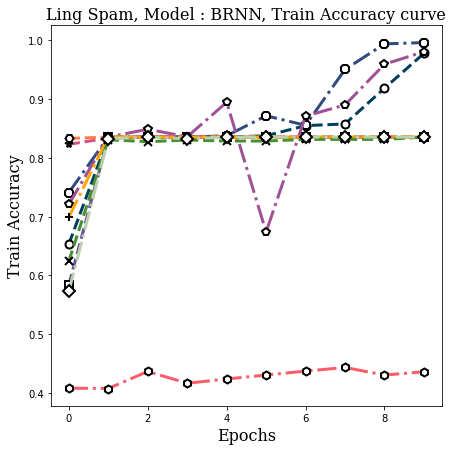

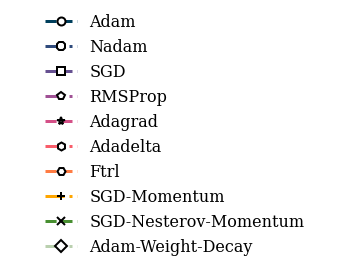

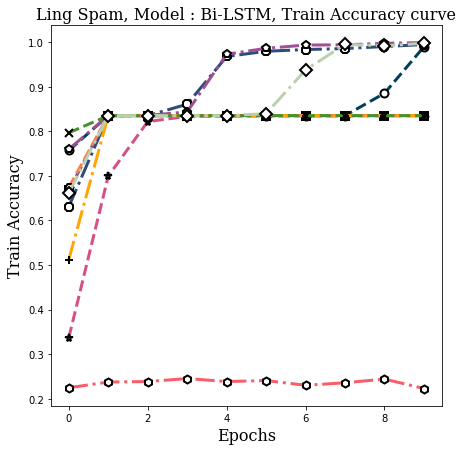

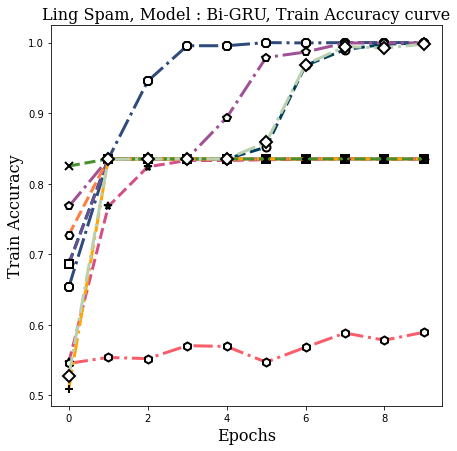

In [153]:
Histories = Deliverables["Optimizer_history"].copy()

col = ['#feb24c','#fd8d3c','#fc4e2a','#e31a1c','#bd0026','#dadaeb','#bcbddc','#9e9ac8','#807dba','#6a51a3']
col_2 = ["#238b45", "#88419d", "#2b8cbe", "#ef6548", "#3690c0", "#df65b0", "#41b6c4", "#6a51a3", "#c7e9b4", "#74a9cf"]
col_3 = ["#003f5c","#2f4b7c","#665191","#a05195","#d45087","#f95d6a","#ff7c43","#ffa600","#488f31","#bad0af"]

from cycler import cycler
import matplotlib.pyplot as plt
custom_cycler = (cycler(color=col_3) +
                 cycler(marker=['o', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D']))

# Global plot parameters
plt.rc('lines', linewidth=3, markerfacecolor='white', markeredgewidth=2, markersize=8, linestyle='--')
plt.rc('axes', prop_cycle=custom_cycler)
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

def plot_metric(metric, history, y_label):

  for k, v in enumerate(history.items()):
    print(v[0],v[1])
    fig, ax = plt.subplots(figsize=(7,7))  # Create a figure and an axes.
    #plot legend handles
    plt_handles = []
    for index_of_optim, i in enumerate(Optimizer_list):
      if index_of_optim % 2 == 0:
        plot_ = ax.plot(history[v[0]][index_of_optim].history[metric], linestyle='--', label=i)
        plt_handles.append(plot_[0])
      else: 
        plot_ = ax.plot(history[v[0]][index_of_optim].history[metric], linestyle='-.', label=i)
        plt_handles.append(plot_[0])
    ax.set_xlabel('Epochs', fontdict=font)  
    ax.set_ylabel(y_label, fontdict=font) 
    ax.set_title(f"Ling Spam, Model : {v[0]}, {y_label} curve", fontdict=font) 
    plt.savefig(f"{Visuals}Accuracy_Loss/LingSpam_{metric}_{v[0]}.jpeg")
    if k == 0:
      fig_legend = plt.figure()
      plt.legend(handles = plt_handles, loc = 'center', prop={'family': 'serif', 'size': 16}, frameon=False)
      plt.axis("off")
      plt.savefig(f"{Visuals}Accuracy_Loss/LingSpam_{metric}_{v[0]}_legend.jpeg", bbox_inches='tight')


plot_metric("accuracy", Histories, "Train Accuracy")

BRNN [<keras.callbacks.History object at 0x7f58927fdc10>, <keras.callbacks.History object at 0x7f58144df610>, <keras.callbacks.History object at 0x7f57fe583cd0>, <keras.callbacks.History object at 0x7f57fe0a71d0>, <keras.callbacks.History object at 0x7f57f813c090>, <keras.callbacks.History object at 0x7f56f4e9b110>, <keras.callbacks.History object at 0x7f56f49c5410>, <keras.callbacks.History object at 0x7f56ee7b5090>, <keras.callbacks.History object at 0x7f56ef6c8b90>, <keras.callbacks.History object at 0x7f56ef2c38d0>]
Bi-LSTM [<keras.callbacks.History object at 0x7f56e8e70a90>, <keras.callbacks.History object at 0x7f56e9bf5910>, <keras.callbacks.History object at 0x7f56e6c7fd50>, <keras.callbacks.History object at 0x7f55bd1cca90>, <keras.callbacks.History object at 0x7f55acd11c90>, <keras.callbacks.History object at 0x7f55aac66050>, <keras.callbacks.History object at 0x7f55aacb32d0>, <keras.callbacks.History object at 0x7f55a5e2c090>, <keras.callbacks.History object at 0x7f55a3bf1b10

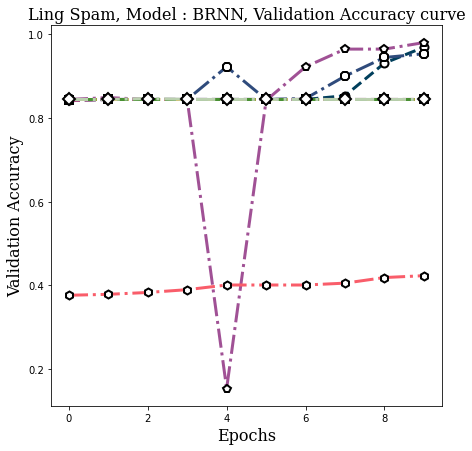

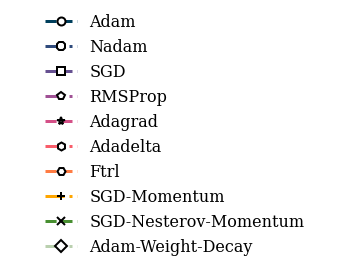

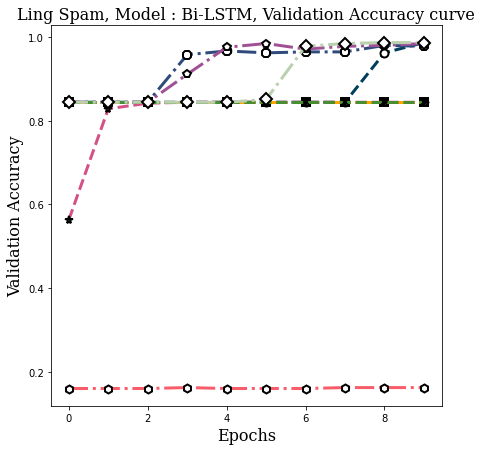

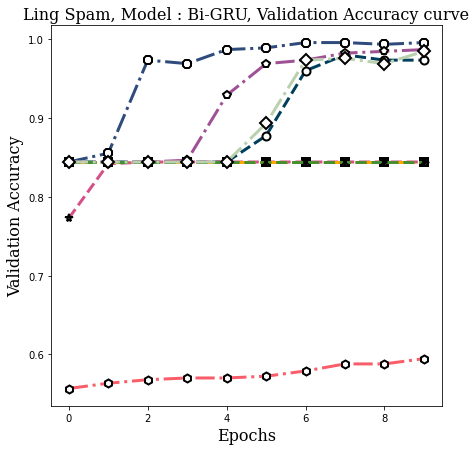

In [154]:
plot_metric("val_accuracy", Histories, "Validation Accuracy")

BRNN [<keras.callbacks.History object at 0x7f58927fdc10>, <keras.callbacks.History object at 0x7f58144df610>, <keras.callbacks.History object at 0x7f57fe583cd0>, <keras.callbacks.History object at 0x7f57fe0a71d0>, <keras.callbacks.History object at 0x7f57f813c090>, <keras.callbacks.History object at 0x7f56f4e9b110>, <keras.callbacks.History object at 0x7f56f49c5410>, <keras.callbacks.History object at 0x7f56ee7b5090>, <keras.callbacks.History object at 0x7f56ef6c8b90>, <keras.callbacks.History object at 0x7f56ef2c38d0>]
Bi-LSTM [<keras.callbacks.History object at 0x7f56e8e70a90>, <keras.callbacks.History object at 0x7f56e9bf5910>, <keras.callbacks.History object at 0x7f56e6c7fd50>, <keras.callbacks.History object at 0x7f55bd1cca90>, <keras.callbacks.History object at 0x7f55acd11c90>, <keras.callbacks.History object at 0x7f55aac66050>, <keras.callbacks.History object at 0x7f55aacb32d0>, <keras.callbacks.History object at 0x7f55a5e2c090>, <keras.callbacks.History object at 0x7f55a3bf1b10

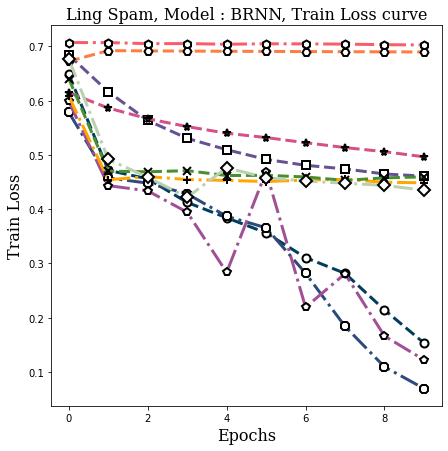

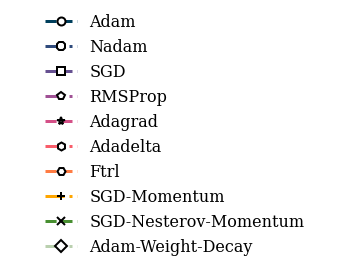

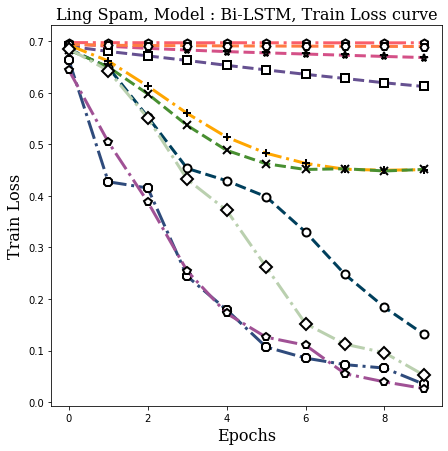

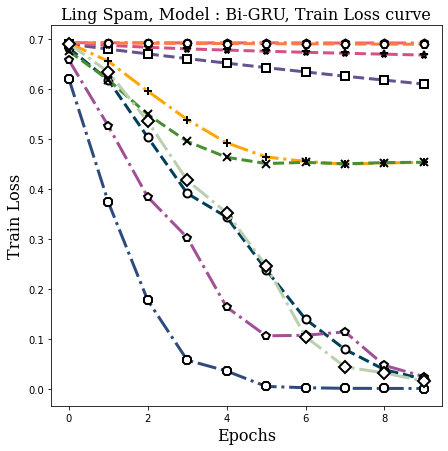

In [155]:
plot_metric("loss", Histories, "Train Loss")

BRNN [<keras.callbacks.History object at 0x7f58927fdc10>, <keras.callbacks.History object at 0x7f58144df610>, <keras.callbacks.History object at 0x7f57fe583cd0>, <keras.callbacks.History object at 0x7f57fe0a71d0>, <keras.callbacks.History object at 0x7f57f813c090>, <keras.callbacks.History object at 0x7f56f4e9b110>, <keras.callbacks.History object at 0x7f56f49c5410>, <keras.callbacks.History object at 0x7f56ee7b5090>, <keras.callbacks.History object at 0x7f56ef6c8b90>, <keras.callbacks.History object at 0x7f56ef2c38d0>]
Bi-LSTM [<keras.callbacks.History object at 0x7f56e8e70a90>, <keras.callbacks.History object at 0x7f56e9bf5910>, <keras.callbacks.History object at 0x7f56e6c7fd50>, <keras.callbacks.History object at 0x7f55bd1cca90>, <keras.callbacks.History object at 0x7f55acd11c90>, <keras.callbacks.History object at 0x7f55aac66050>, <keras.callbacks.History object at 0x7f55aacb32d0>, <keras.callbacks.History object at 0x7f55a5e2c090>, <keras.callbacks.History object at 0x7f55a3bf1b10

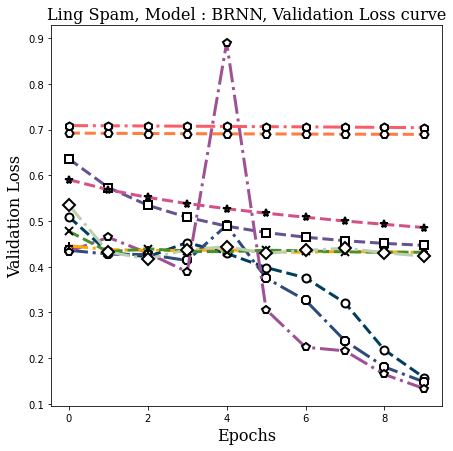

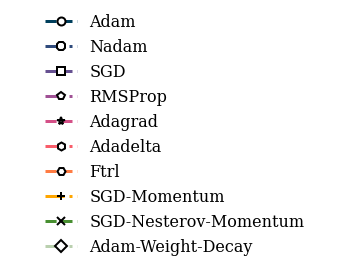

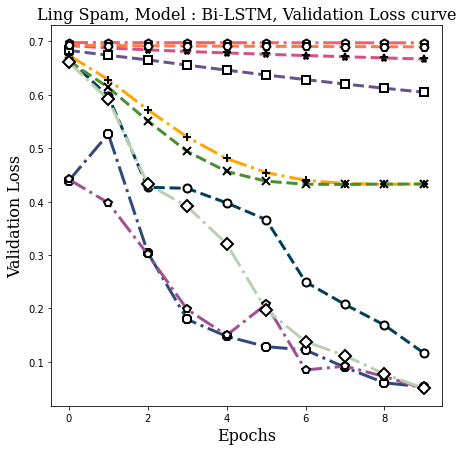

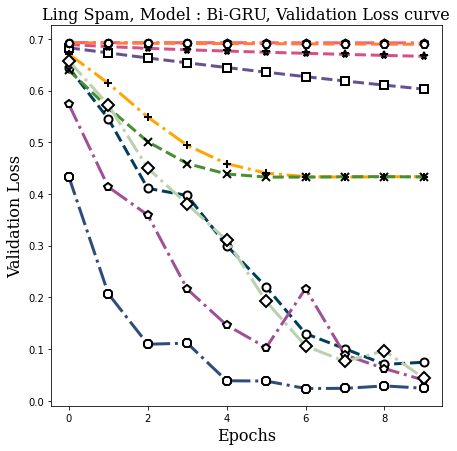

In [156]:
plot_metric("val_loss", Histories, "Validation Loss")

In [157]:
# with open(f"comparison/classifiers/train_test_tf_idf.pkl", "rb") as open_file:
#     dataset_processed = pickle.load(open_file)